In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
data = pd.read_csv('Credit_Card_Applications.csv')
data.head()

,CustomerID,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,Class
0,15776156,1,22.08,11.46,2,4,4,1.585,0,0,0,1,2,100,1213,0
1,15739548,0,22.67,7.00,2,8,4,0.165,0,0,0,0,2,160,1,0
2,15662854,0,29.58,1.75,1,4,4,1.250,0,0,0,1,2,280,1,0
3,15687688,0,21.67,11.50,1,5,3,0.000,1,1,11,1,2,0,1,1
4,15715750,1,20.17,8.17,2,6,4,1.960,1,1,14,0,2,60,159,1


In [3]:
X = data.iloc[:, 1:-1].values
y = data.iloc[:, -1].values

In [4]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [5]:
num_classes = len(np.unique(y))
y_onehot = np.eye(num_classes)[y]

In [6]:
# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y_onehot, test_size=0.2, random_state=42)

In [7]:
def relu(x):
    return np.maximum(0, x)

def relu_derivative(x):
    return (x > 0).astype(float)

def softmax(x):
    exp_x = np.exp(x - np.max(x, axis=1, keepdims=True))  # For numerical stability
    return exp_x / np.sum(exp_x, axis=1, keepdims=True)

In [8]:
np.random.seed(42)
input_size = X_train.shape[1]
hidden_size = 64  # Number of neurons in hidden layer
output_size = num_classes

In [9]:
W1 = np.random.randn(input_size, hidden_size)
b1 = np.zeros((1, hidden_size))
W2 = np.random.randn(hidden_size, output_size)
b2 = np.zeros((1, output_size))

In [10]:
learning_rate = 0.01
epochs = 500
losses = []

In [11]:
# Training loop
for epoch in range(epochs):
    # Forward pass
    z1 = np.dot(X_train, W1) + b1
    a1 = relu(z1)
    z2 = np.dot(a1, W2) + b2
    predictions = softmax(z2)
    
    # Compute loss (mean squared error)
    loss = np.mean((predictions - y_train) ** 2)
    losses.append(loss)
    
    # Backward pass
    d_loss = 2 * (predictions - y_train) / y_train.shape[0]
    d_z2 = d_loss * predictions * (1 - predictions)  # Derivative of softmax with MSE
    
    d_W2 = np.dot(a1.T, d_z2)
    d_b2 = np.sum(d_z2, axis=0, keepdims=True)
    d_a1 = np.dot(d_z2, W2.T)
    d_z1 = d_a1 * relu_derivative(z1)
    
    d_W1 = np.dot(X_train.T, d_z1)
    d_b1 = np.sum(d_z1, axis=0, keepdims=True)
    
    # Update weights and biases
    W1 -= learning_rate * d_W1
    b1 -= learning_rate * d_b1
    W2 -= learning_rate * d_W2
    b2 -= learning_rate * d_b2
    
    # Print loss every 50 epochs
    if epoch % 50 == 0:
        print(f"Epoch {epoch}, Loss: {loss:.4f}")

Epoch 0, Loss: 0.4306
Epoch 50, Loss: 0.4169
Epoch 100, Loss: 0.4016
Epoch 150, Loss: 0.3864
Epoch 200, Loss: 0.3750
Epoch 250, Loss: 0.3659
Epoch 300, Loss: 0.3595
Epoch 350, Loss: 0.3523
Epoch 400, Loss: 0.3443
Epoch 450, Loss: 0.3376


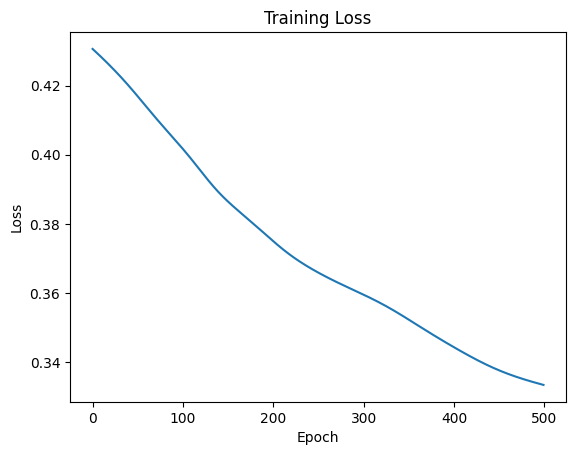

In [12]:
# Plot training loss
plt.plot(losses)
plt.title("Training Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()